<a href="https://colab.research.google.com/github/phudo0605/AI/blob/main/HW5/Problem1_Optimum_Design_I_beam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1: Optimum Design of an I-beam**

Stability of the beams is one of important factors in structural designs.
In order to optimize the beam's stability, we are going to minimize a function F=[f1,f2]T where the cross section area (f1) and the static deflection (f2) of the I-beam are two objectives conflicting in nature since minimization of f1 will result in maximization of f2 and vice versa.
f1 and f2 are defined as:
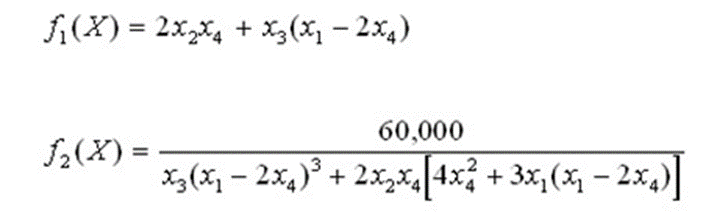



The geometric side constraints are:
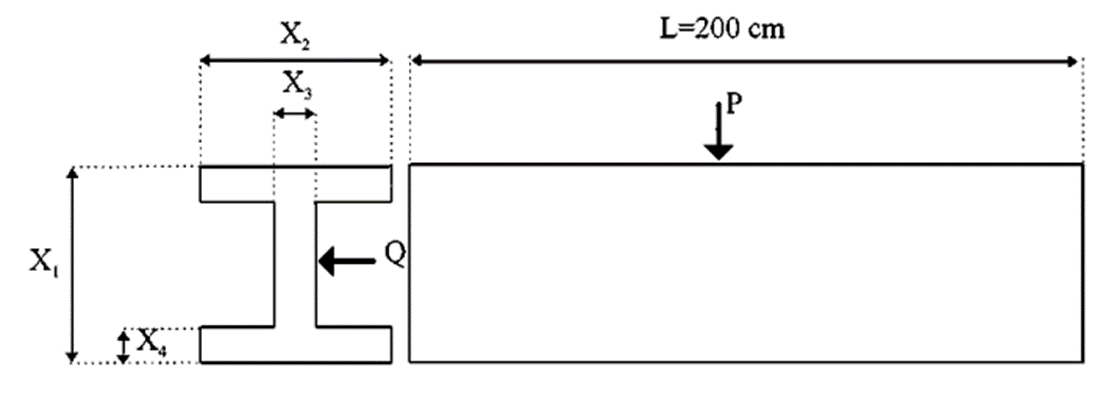

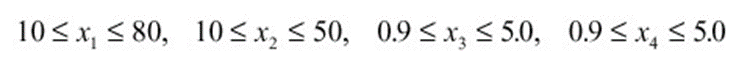


We are going to use the genetic algorithm in R to perform the optimization for 2 above objectives.
The following codes are applied to install and load necessary packages, libraries used to perform GA on the objectives.

In [2]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

# Loading the needed libraries

library(GA)
library(plotly)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -40.06514 
Solution = 
           x1       x2       x3       x4
[1,] 34.65199 14.37886 1.104672 1.564025

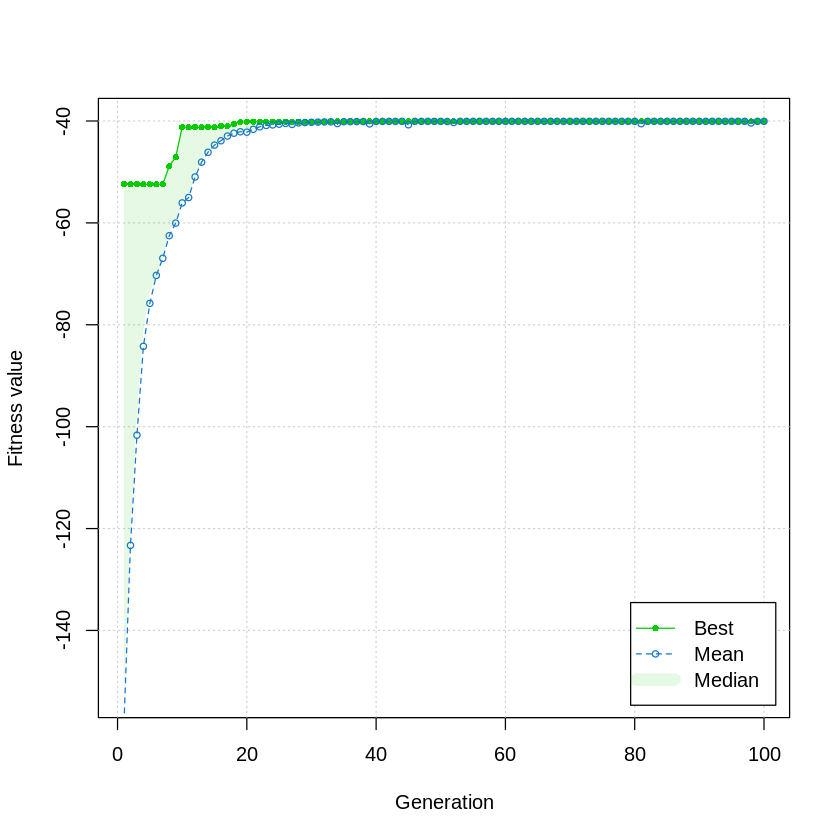

In [15]:
#  Define the function to be optimized together with dimension constraints
# 2 objectives functions are combined into one function f= a*f1+b*f2
# where a and b are the degrees of importance associated with f1 and f2, respectively.
# Based on the estimated weight of each objective in the function f, we can adjust the values of a & b as long as a+b=1.
# Because the GA only perform maximization. Knowing that minimization of (f) equals to maximization of (-f).
# Therefore, we set a and b as negative numbers, a+b = -1, to have final (-f) before running the algorithm.
# Below is the first case where a=b= -0.5 (both objectives are equally important)
f<- function(x){
  f1<- 2*x[2]*x[4] + x[3]*(x[1] - 2*x[4])

  f2<- 60000/(x[3]*((x[1] - 2*x[4])^3) + 2*x[2]*x[4]*(4*x[4]^2 + 3*x[1]*(x[1]-2*x[4])))

  return(a*f1 + b*f2)
}

# Set lower & upper bound; step size determines precision
x1 = seq(10, 80, by = 0.01)
x2 = seq(10, 50, by = 0.01)
x3 = seq(0.9, 5.0, by = 0.01)
x4 = seq(0.9, 5.0, by = 0.01)
a = -0.5
b = -0.5

# Applied Genetic Algorithm, summarize and plot the results
GA = ga(type = "real-valued",
        fitness = f,
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001)

summary(GA)

plot(GA)


When both objectives have the same weight (a=b=0.5): results showed that the minimum value of function can be reached at 40.06514  (change negative to positive number because of the above setting) with solution using a set of dimensions (x1=34.65199, x2=14.37886, x3=1.104672, x4=1.564025).
From the graph, we can see that GA can give minimzation result after about 20 generations. The average population fitness (mean) starts from around 150 and goes down to 40 after several optimizing generations.

In order to have a better look at how each objective is optimized separately  in the function, we consider some other cases as below:

a=-1, b=0: we just consider the role of cross section area

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -65.13634 
Solution = 
           x1       x2       x3       x4
[1,] 12.57549 14.57045 1.704234 1.698431

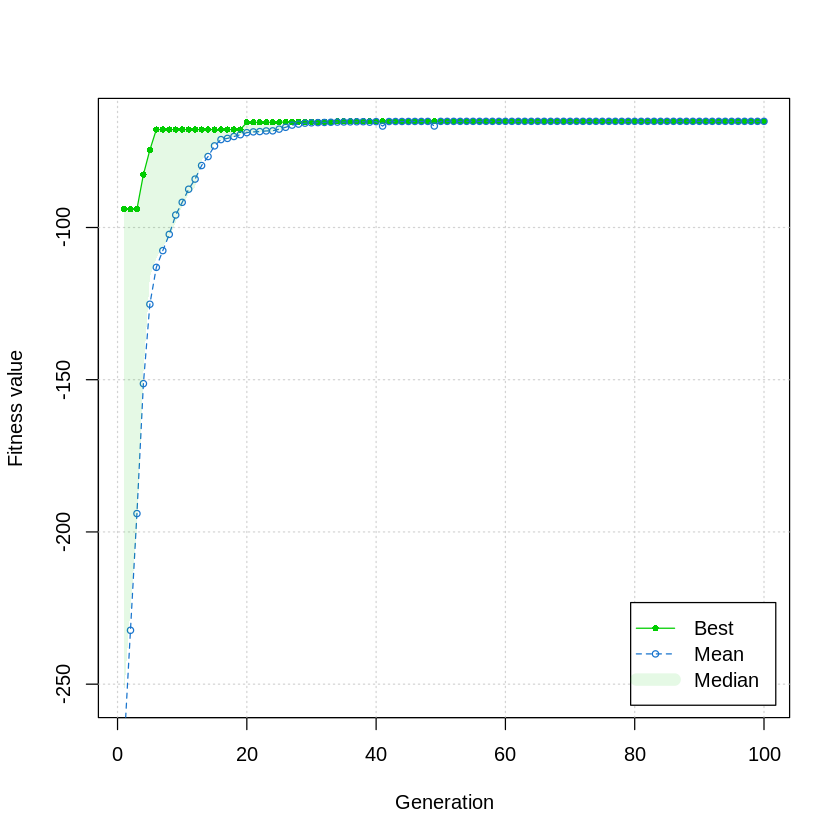

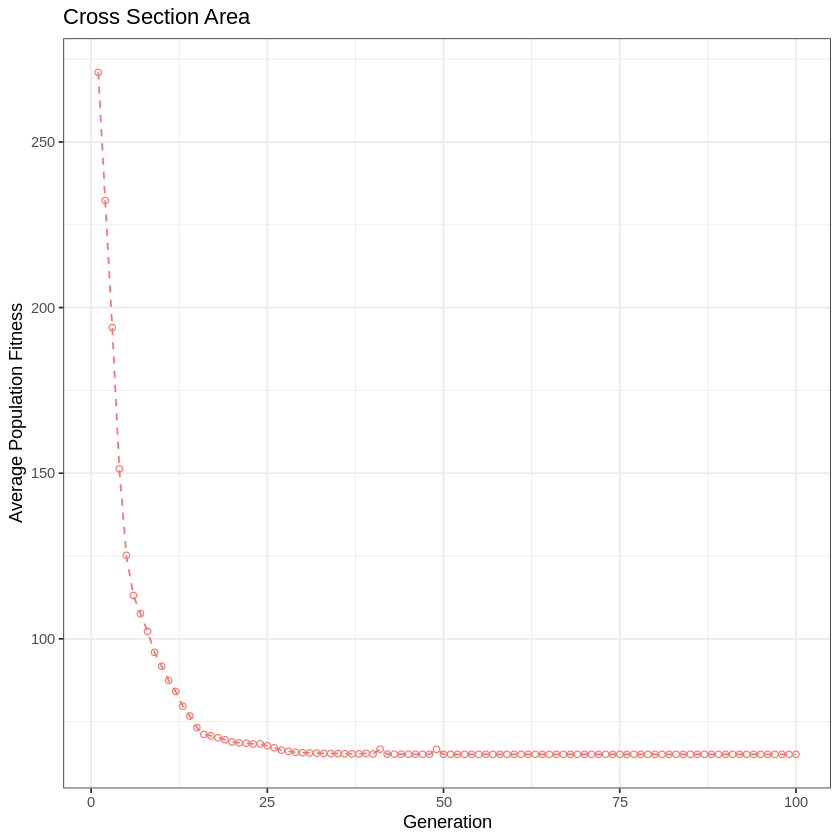

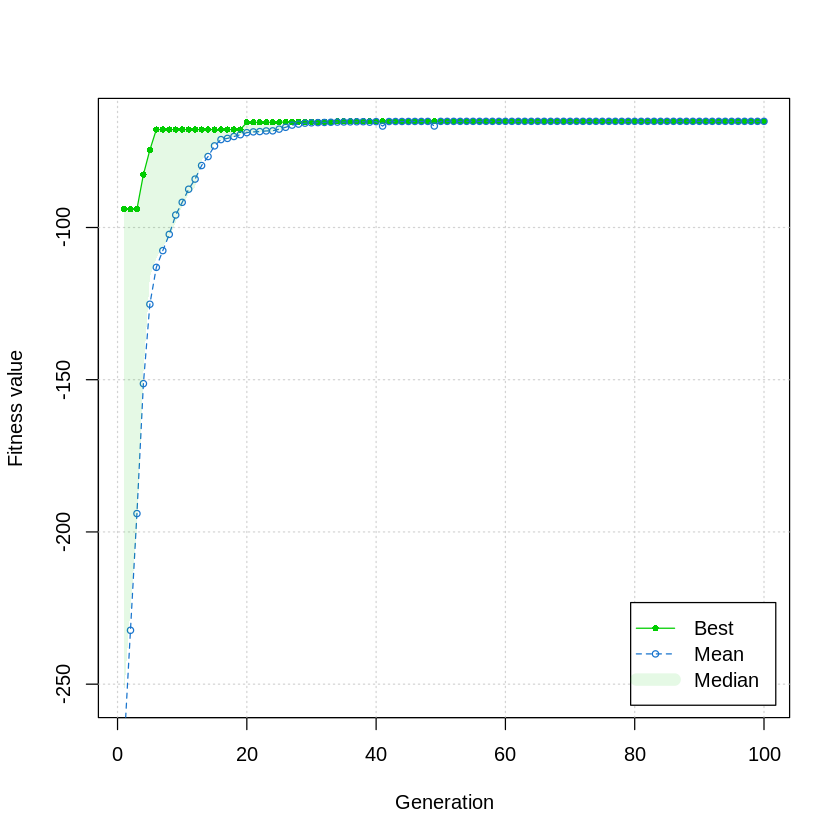

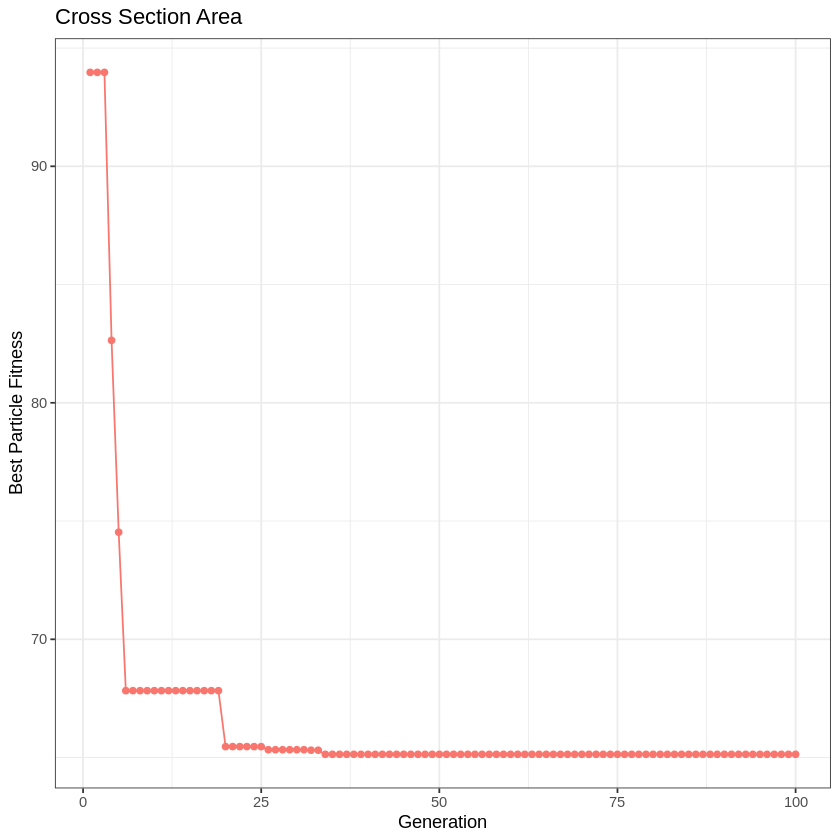

In [18]:
f<- function(x){
  f1<- 2*x[2]*x[4] + x[3]*(x[1] - 2*x[4])

  f2<- 60000/(x[3]*((x[1] - 2*x[4])^3) + 2*x[2]*x[4]*(4*x[4]^2 + 3*x[1]*(x[1]-2*x[4])))

  return(a*f1 + b*f2)
}

# Set lower & upper bound; step size determines precision
x1 = seq(10, 80, by = 0.01)
x2 = seq(10, 50, by = 0.01)
x3 = seq(0.9, 5.0, by = 0.01)
x4 = seq(0.9, 5.0, by = 0.01)
a = -1
b = 0

GA = ga(type = "real-valued",
        fitness = f,
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001)

summary(GA)

#plot(GA)

# To have a better view on minimization process of the cross section area, we apply
# the ggplot where the mean values are changed to positive by adding negative sign.
out <- plot(GA)
ggplot(out) +
geom_line(aes(x = iter, y = -mean, colour = "mean"), lty = 2) +
geom_point(aes(x = iter, y = -mean, colour = "mean"), pch = 1) +
theme_bw() + theme(legend.title = element_blank(), legend.position = "none", legend.background = element_blank()) +
labs( title="Cross Section Area", x="Generation", y="Average Population Fitness")


# To observe the best particle fitness on each generation, we apply
# the ggplot where the max values are changed to positive by adding negative sign.
out <- plot(GA)
ggplot(out) +
geom_line(aes(x = iter, y = -max, colour = "max")) +
geom_point(aes(x = iter, y = -max, colour = "max")) +
theme_bw() + theme(legend.title = element_blank(), legend.position = "none", legend.background = element_blank()) +
labs(title="Cross Section Area", x="Generation", y="Best Particle Fitness")

If we consider minimizing only cross section area (a=-1, b=0), minimum value can be reached at 65.13634 after about 15 generations. In this case, the values of beam sides are (x1=12.57549, x2=14.57045, x3=1.704234, x4=1.698431).
To compare with the case (a=b=-0.5), where both objectives are considered, we can see x3 and x4 are not much different. However, significant differences for x1 and x2 values (x1=34.65199, x2=14.37886).
These differences are logical according to the structural view. We can figure out that the vertical axis x1 (see above picture with dimension description) plays a critical role in supporting the whole structure above the beam. Meanwhile, x2 is also important in spreadly distributing the pressing force. In the first case (a=b=-0.5), because we want to minimize both objectives, the static deflection and the cross section area. Therefore, there is a trade-off between 2 objectives. To gain such a minimum value in static deflection, we have to accept greater the cross section dimentions.
The average population fitness values (or mean of population minimum value) are optimized after about 20 generations.
From the best particle fitness graph, we can see that after only 5 generations, the optimization process start working effectively.

Below is the codes for another case (a=0, b=-1).
All setting are similar to the above cases.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.008525829 
Solution = 
           x1       x2       x3       x4
[1,] 75.91667 46.92615 3.232908 4.161006

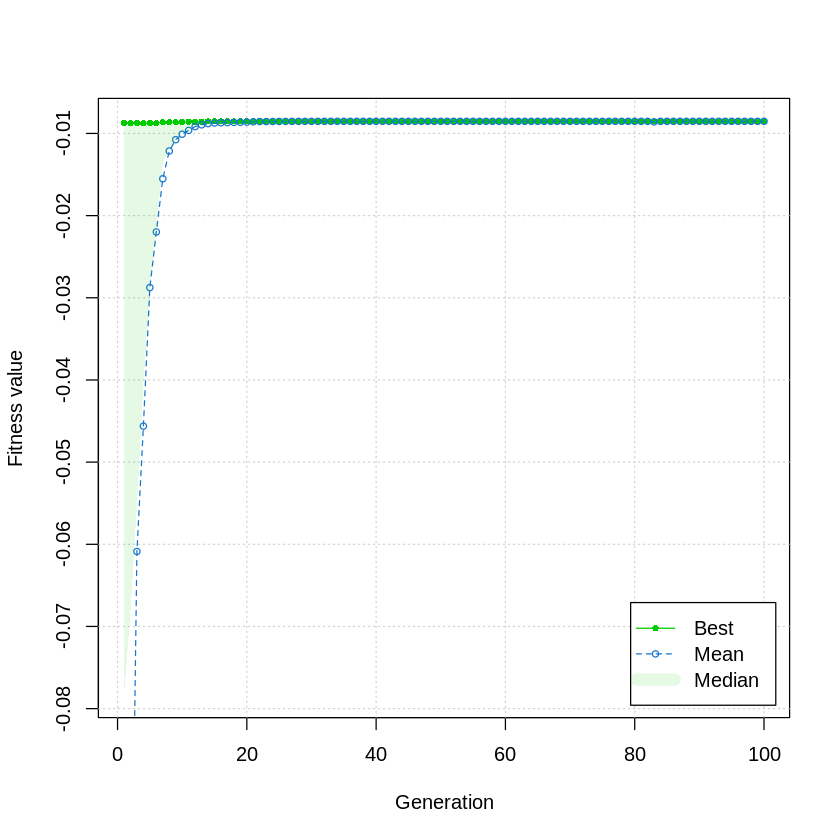

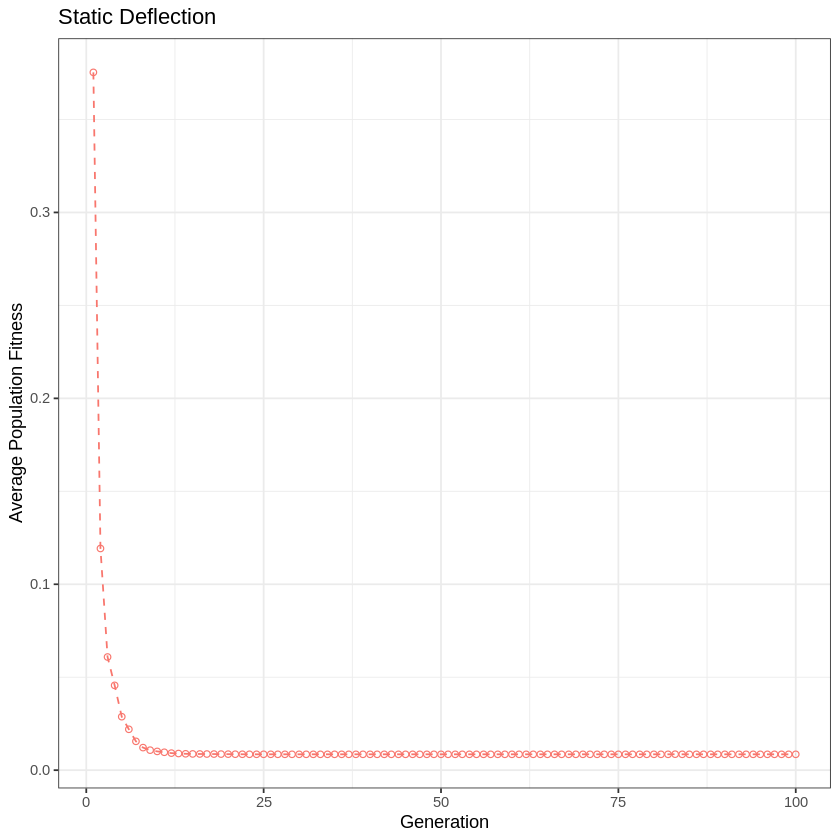

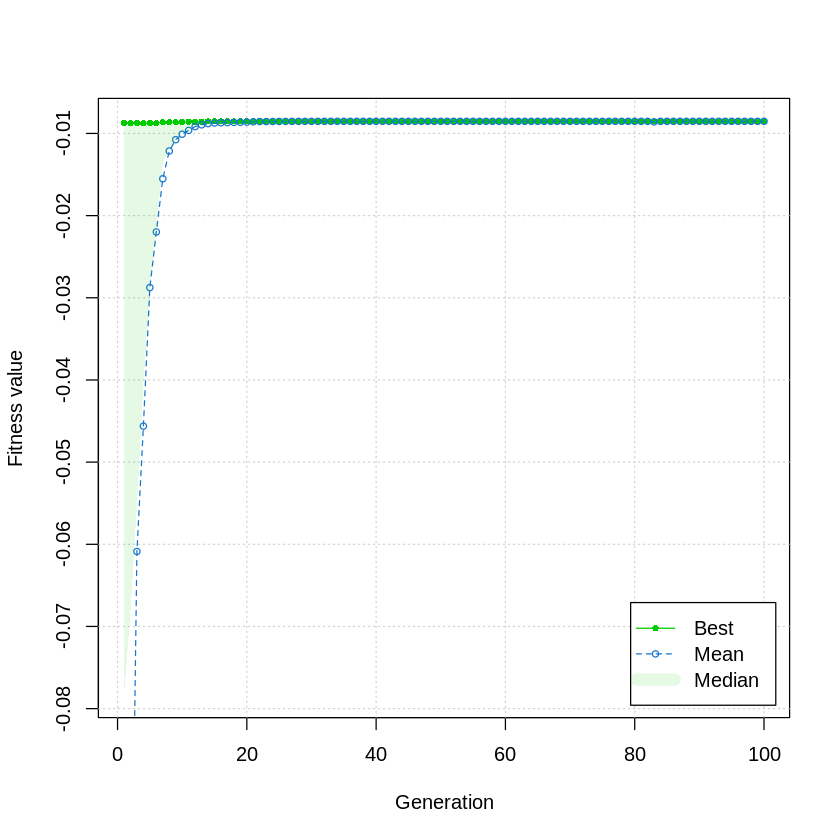

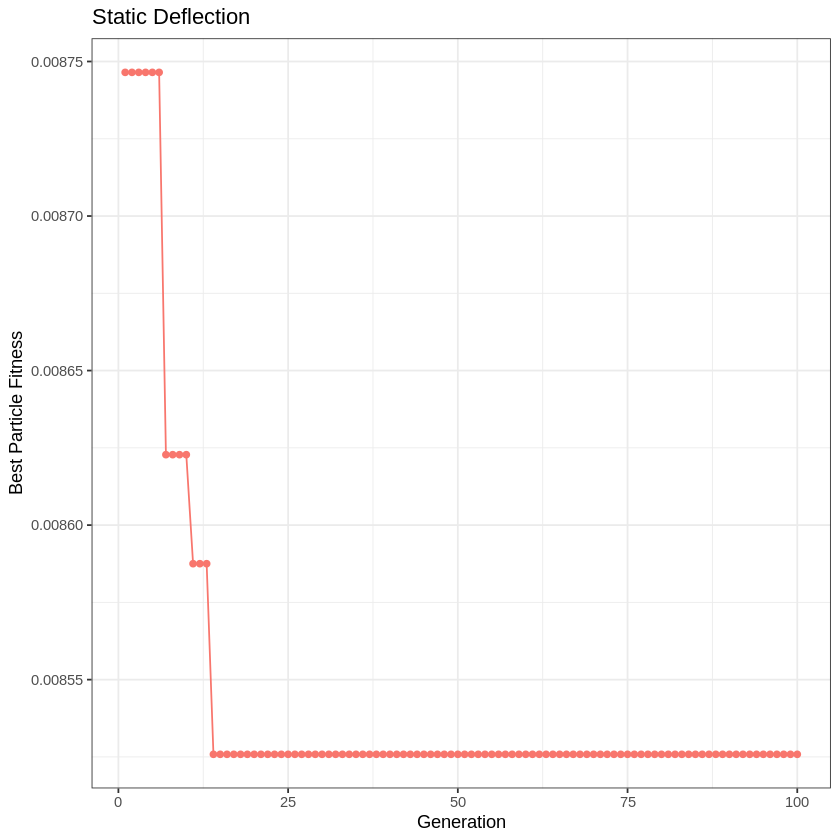

In [ ]:
#Now we consider another case:
#a=0, b=-1: we just consider the objective of static deflection

f<- function(x){
  f1<- 2*x[2]*x[4] + x[3]*(x[1] - 2*x[4])

  f2<- 60000/(x[3]*((x[1] - 2*x[4])^3) + 2*x[2]*x[4]*(4*x[4]^2 + 3*x[1]*(x[1]-2*x[4])))

  return(a*f1 + b*f2)
}

# Set lower & upper bound; step size determines precision
x1 = seq(10, 80, by = 0.01)
x2 = seq(10, 50, by = 0.01)
x3 = seq(0.9, 5.0, by = 0.01)
x4 = seq(0.9, 5.0, by = 0.01)
a = 0
b = -1

GA = ga(type = "real-valued",
        fitness = f,
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
        popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001)

summary(GA)

#plot(GA)

# To have a better view on minimization process of the cross section area, we apply
# the ggplot where the mean values are changed to positive by adding negative sign.
out <- plot(GA)
ggplot(out) +
geom_line(aes(x = iter, y = -mean, colour = "mean"), lty = 2) +
geom_point(aes(x = iter, y = -mean, colour = "mean"), pch = 1) +
theme_bw() + theme(legend.title = element_blank(), legend.position = "none", legend.background = element_blank()) +
labs( title="Static Deflection", x="Generation", y="Average Population Fitness")


# To see clearly the best particle fitness on each generation, we apply
# the ggplot where the max values are changed to positive by adding negative sign.
out <- plot(GA)
ggplot(out) +
geom_line(aes(x = iter, y = -max, colour = "max")) +
geom_point(aes(x = iter, y = -max, colour = "max")) +
theme_bw() + theme(legend.title = element_blank(), legend.position = "none", legend.background = element_blank()) +
labs(title="Static Deflection", x="Generation", y="Best Particle Fitness")

In this case, GA gives a solution with a set of dimensions (x1=75.91667, x2=46.92615, x3=3.232908, x4=4.161006).
It is clear that all sides of the beam are much greater than those in the other cases (a=b=-0.5 or a=-1,b=0). These increased sides are necessary for making the structure more stable, and therefore minimizing the static deflection.

Conclusion: as minimizing each objective separately provided a clear view on the trade-off we need to consider when choosing the weight for each objective in the complete function with both objectives. If we care more about static deflection, the beam sides would be much greater than in case we just care more about the cross section. The full consideration should be kept balance between both objectives and relied on other conditions such as: pricing, environment, geographic, other structural materials etc. The work need to be weighted by a team of different experts